In [1]:
import h5py, os, pickle
from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from ecog.utils import bands
from cv_paper_plots.style import subject_colors, letter_fontstyle
from cv_paper_plots import xfreq_analysis, xfreq_classification

In [2]:
folder = os.path.join(os.environ['HOME'],'Development/data/ecog/AA_ff/')
subjects = ['ec2', 'ec9', 'gp31', 'gp33']
files = ['EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'EC9_blocks_15_39_46_49_53_60_63_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP31_blocks_1_2_4_6_9_21_63_65_67_69_71_78_82_83_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP33_blocks_1_5_30_CV_AA_ff_align_window_-0.5_to_0.79_file.h5']

# Create data

In [3]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
channels = [103, 106]
with h5py.File(os.path.join(folder, files[0])) as f:
    for ch in channels:
        xfreq_analysis.save_power(f, ch, cv, subject)

In [4]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_correlations(f, subject)

ec2
ec9
gp31
gp33


In [3]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_hg_power(f, subject)

ec2
ec9
gp31
gp33


In [118]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_time_correlations(f, subject)

ec2
ec9
gp31
gp33


# Plot 1

In [3]:
plt.close()
f = plt.figure(figsize=(5, 5))

l_edge = .125
t_edge = .05
r_edge = .05
b_edge = .08

h_gap = .15

v1_gap = .025
v2_gap = .1

r1_height = .3
r3_height = .3
r2_height = 1. - t_edge - r1_height - v1_gap - v2_gap - r3_height - b_edge

width = (1. - l_edge - r_edge - h_gap) / 2.

c1_x = l_edge + width + h_gap

r1_y = v1_gap + r2_height + v2_gap + r3_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])
cax = f.add_axes([c1_x - .95 * h_gap, 1. * r1_y, .025, .1])

r2_y =v2_gap + r3_height + b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

r3_y = b_edge
ax4 = f.add_axes([l_edge, r3_y, width, r3_height])
r3_half_height = (r3_height - v2_gap) / 2
ax5 = f.add_axes([c1_x, r3_y + r3_half_height + v2_gap, width, r3_half_height])
ax6 = f.add_axes([c1_x, r3_y, width, r3_half_height])

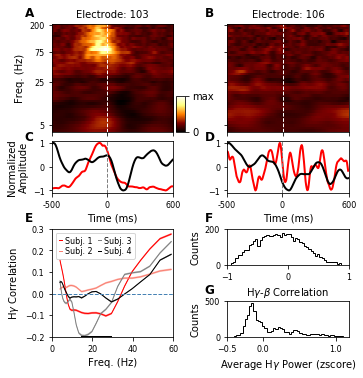

In [4]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
im = xfreq_analysis.plot_power(subject, ch, cv, [ax0, ax2], vmin=-0.725590412048, vmax=2.90856576009)

c = f.colorbar(im, cax=cax)
c.set_ticks([-0.725590412048, 2.90856576009])
c.set_ticklabels([0, 'max'])

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, ax3], vmin=-0.725590412048, vmax=2.90856576009)
ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylabel('')
ax3.set_ylabel('')

xfreq_analysis.plot_correlations(subjects, ax4, kind='freq')

xfreq_analysis.plot_correlation_histogram(subject, ax5)

xfreq_analysis.plot_power_histogram(subject, ax6)


x0 = .05
y0 = .97
x1 = .55
y1 = .625
y2 = .4
y3 = .2

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)
f.text(x0, y2, 'E', **letter_fontstyle)
f.text(x1, y2, 'F', **letter_fontstyle)
f.text(x1, y3, 'G', **letter_fontstyle)

plt.savefig('/home/jesse/Downloads/xfreq1.pdf')
plt.savefig('/home/jesse/Downloads/xfreq1.png', dpi=300)

plt.show()

# Plot 2

In [15]:
plt.close()
figsize=(5, 4.5)
f = plt.figure(figsize=figsize)
x_over_y = figsize[0] / figsize[1]

l_edge = .13
t_edge = .02
r_edge = .03
b_edge = .115

v_gap = .15

h_gap = .15

width = (1. - l_edge - r_edge - h_gap) / 2.

r0_height = width * x_over_y
r1_height = (1. - t_edge - r0_height - v_gap - b_edge)

c1_x = l_edge + width + h_gap

r0_y = r1_height + v_gap + b_edge
ax0 = f.add_axes([l_edge, r0_y, width, r0_height])
ax1 = f.add_axes([c1_x, r0_y, width, r0_height])

r1_y = b_edge
ax2 = f.add_axes([l_edge, r1_y, width, r1_height])
ax3 = f.add_axes([c1_x, r1_y, width, r1_height])

['ec2', 'gp33']
0.5140412997423821 -0.322845031983759
0.4626465589195801 -0.09203090988594637
['ec9', 'gp31']
0.1125931243267202 0.00043225027646702323
-0.7952517482832266 -0.3029612980851057


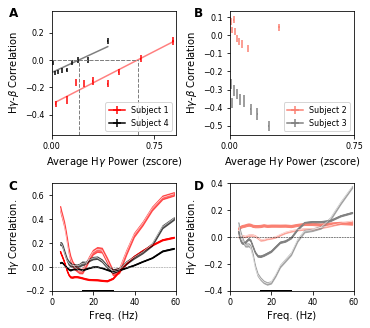

In [16]:
reload(xfreq_analysis)

pcts = xfreq_analysis.plot_power_correlations(['ec2', 'gp33'], ax0)

xfreq_analysis.plot_power_correlations(['ec9', 'gp31'], ax1, cutoff_pct=np.mean(pcts))
                                       
xfreq_analysis.plot_resolved_power_correlations(['ec2', 'gp33'], ax2)
xfreq_analysis.plot_resolved_power_correlations(['ec9', 'gp31'], ax3, hline_c='black')

x0 = .01
y0 = r0_y + r0_height - .02
x1 = .525
y1 = r1_y + r1_height - .02

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)

plt.savefig('/home/jesse/Downloads/xfreq2.pdf')
plt.savefig('/home/jesse/Downloads/xfreq2.png', dpi=300)

plt.show()

# Plot 3

In [4]:
with open(os.path.join(os.environ['HOME'], 'plots/xfreq/data/multiband_results_pca.pkl'), 'rb') as f:
    data = pickle.load(f, encoding='latin1')
single, multi, single_a, multi_a = data

In [5]:
bands = [r'$\theta$', r'$\alpha$', r'L$\beta$', r'H$\beta$', r'$\gamma$']
band_abbreviations = ['t', 'a', 'b', 'hb', 'g']
d = np.load(os.path.join(os.environ['HOME'], 'plots/ds/data/dataset_chance.npz'))
chance = d['chance_data'][0, :, -1].mean(axis=-1)
training_size = d['training_size']
subjects = ['ec2', 'ec9', 'gp31', 'gp33']

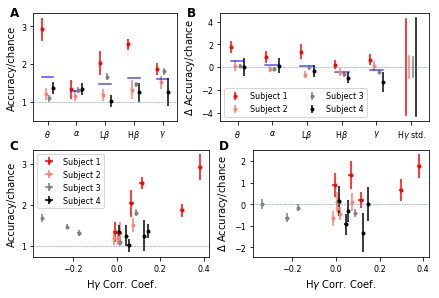

In [25]:
plt.close()
reload(xfreq_classification)
f= plt.figure(figsize=(6, 4))

l_edge = .075
r_edge = .01
t_edge = .03
b_edge = .125

h_gap = .1
v_gap = .1

height = (1. - t_edge - b_edge - v_gap) / 2.
width = (1. - l_edge - r_edge - h_gap) / 2.

c0_x = l_edge
r0_y = b_edge + height + v_gap
del_x = .075
c1_x = l_edge + (width - del_x) + h_gap
ax0 = f.add_axes([c0_x, r0_y, width - del_x, height])
ax1 = f.add_axes([c1_x, r0_y, width + del_x, height])

c0_x = l_edge
r0_y = b_edge
c1_x = l_edge + width + h_gap
ax2 = f.add_axes([c0_x, r0_y, width, height])
ax3 = f.add_axes([c1_x, r0_y, width, height])

xfreq_classification.plot_xfreq_classification(subjects, band_abbreviations, bands,
                                               single_a, multi_a, chance, [ax0, ax1])

xfreq_classification.plot_correlation_vs_accuracy(subjects, band_abbreviations, bands,
                                                  single_a, multi_a, chance, [ax2, ax3])


x0 = .02
y0 = .96
x1 = .43
y1 = .5
x2 = .505

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x2, y1, 'D', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband.png'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband.pdf'))
plt.show()

# Plot 4

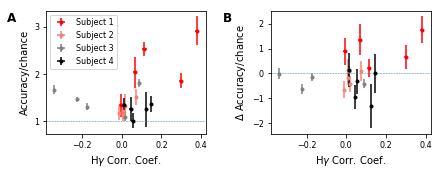

In [11]:
plt.close()
reload(xfreq_classification)
f= plt.figure(figsize=(6, 2))

l_edge = .1
r_edge = .01
t_edge = .02
b_edge = .125

h_gap = .15

height = 1. - t_edge - b_edge
width = (1. - l_edge - r_edge - h_gap) / 2.



x0 = .01
y0 = .9
x1 = .51

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband2.png'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband2.pdf'))
plt.show()

# Old

In [ ]:
plt.close()
reload(xfreq_classification)
f= plt.figure(figsize=(5, 4.5))

l_edge = .1
t_edge = .01
r_edge = .01
b_edge = .1

h_gap = .15
v_gap = .1

height = (1. - t_edge - v_gap - b_edge) / 2.
width = (1. - l_edge - r_edge - h_gap) / 2.

c0_x = l_edge
r0_y = b_edge + height + v_gap
c1_x = l_edge + width + h_gap
r1_y = b_edge
ax0 = f.add_axes([c0_x, r0_y, width, height])
ax1 = f.add_axes([c1_x, r0_y, width, height])
ax2 = f.add_axes([c0_x, r1_y, width, height])
ax3 = f.add_axes([c1_x, r1_y, width, height])

xfreq_classification.plot_xfreq_classification(subjects, band_abbreviations, bands,
                                               single_a, multi_a, chance, [ax0, ax1])

xfreq_classification.plot_correlation_vs_accuracy(subjects, band_abbreviations, bands,
                                                  single_a, multi_a, chance, [ax2, ax3])

x0 = .01
y0 = .96
x1 = .51
y1 = .5

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband.png'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband.pdf'))
plt.show()

# Cosyne

In [161]:
plt.close()
f = plt.figure(figsize=(3.5, 3))

l_edge = .175
t_edge = .07
r_edge = .0375
b_edge = .15

h_gap = .225

v_gap = .175

r1_height = .3
r2_height = 1. - t_edge - r1_height - v_gap - b_edge

width = (1. - l_edge - r_edge - h_gap) / 2.

c1_x = l_edge + width + h_gap

r1_y = v_gap + r2_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])
cax = f.add_axes([c1_x - .95 * h_gap, 1.3 * r1_y, .025, .1])

r2_y = b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

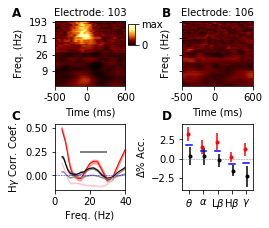

In [162]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
im = xfreq_analysis.plot_power(subject, ch, cv, [ax0, None], vmin=-0.725590412048, vmax=2.90856576009)

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, None], vmin=-0.725590412048, vmax=2.90856576009)
ax1.set_yticklabels([])

xfreq_analysis.plot_resolved_power_correlations(['ec2', 'gp33'], ax2)

c = f.colorbar(im, cax=cax)
c.set_ticks([-0.725590412048, 2.90856576009])
c.set_ticklabels([0, 'max'])
#cax.set_xlabel('Power')

bands = [r'$\theta$', r'$\alpha$', r'L$\beta$', r'H$\beta$', r'$\gamma$']
for ii, ba in enumerate(band_abbreviations):
    for jj in [0, 3]:
        s = subjects[jj]
        col = subject_colors[s]
        x = ii + .05 *(jj-1.5)
        y = 100 * (multi_a[ba][jj, 2]-single_a['hg'][jj, 2]) #/single_a['hg'][jj, 2]
        ym = y.mean()
        ysem = y.std() / np.sqrt(10)
        ax3.errorbar(x, ym, yerr=ysem, fmt='.', c=col)
        ax3.set_xticks(np.arange(len(band_abbreviations)))
        ax3.set_xticklabels(bands)
        ax3.set_xlim(-.5, 4.5)
    ax3.plot([ii - .2, ii + .2],
             2 * [100 * np.mean(multi_a[ba][:, 2][[0, 3]]-single_a['hg'][:, 2][[0, 3]])], 'b')
ax3.set_ylabel(r'$\Delta$% Acc.')
ax3.plot([-10, 10], [0, 0], '--', c='gray', lw=.5)

x0 = .005
y0 = .95
x1 = .6
y1 = .475

f.text(x0, y0, 'A', fontsize=letter_fontsize, fontweight='bold')
f.text(x1, y0, 'B', fontsize=letter_fontsize, fontweight='bold')
f.text(x0, y1, 'C', fontsize=letter_fontsize, fontweight='bold')
f.text(x1, y1, 'D', fontsize=letter_fontsize, fontweight='bold')

plt.savefig('/home/jesse/Downloads/xfreq_cosyne.png', dpi=300)

plt.show()

In [157]:
for ba in band_abbreviations:
    print(np.mean(multi_a[ba][:, 2][[0, 3]]-single_a['hg'][:, 2][[0, 3]]))

0.0180056959391
0.0093660831452
0.0100427329542
-0.00662393271915
-0.00532764196395
